In [1]:
import pandas as pd
import numpy as np

In [2]:
df_s = pd.DataFrame(dict(col1 = [100, 200, 300],
                         col2 = ["a", "b", "c"],
                         shape = ["A", "B", "C"]))
df_s

,col1,col2,shape
0,100,a,A
1,200,b,B
2,300,c,C


In [3]:
df_s.col1

0    100
1    200
2    300
Name: col1, dtype: int64

In [4]:
df_s["col1"]

0    100
1    200
2    300
Name: col1, dtype: int64

In [5]:
df_s.shape

(3, 3)

In [6]:
df_s["shape"]

0    A
1    B
2    C
Name: shape, dtype: object

In [7]:
df_s["shape"][:2]

0    A
1    B
Name: shape, dtype: object

In [10]:
df_s.loc[:1, "shape"]

0    A
1    B
Name: shape, dtype: object

In [11]:
df_s.iloc[:2, ]

,col1,col2,shape
0,100,a,A
1,200,b,B


In [13]:
df_s.loc[:2, ]

,col1,col2,shape
0,100,a,A
1,200,b,B
2,300,c,C


In [14]:
df_s = df_s.rename(columns = {"col1": "v1", "col2": "v2"})

In [15]:
df_s

,v1,v2,shape
0,100,a,A
1,200,b,B
2,300,c,C


In [16]:
df_s.add_suffix("_s")

,v1_s,v2_s,shape_s
0,100,a,A
1,200,b,B
2,300,c,C


In [19]:
df_s.columns = df_s.columns + "_s"

In [20]:
df_s

,v1_s,v2_s,shape_s
0,100,a,A
1,200,b,B
2,300,c,C


In [25]:
df_c1 = pd.DataFrame([[1, 2, 3, 4, 5]])
df_c1

,0,1,2,3,4
0,1,2,3,4,5


In [26]:
df_c1.columns = df_c1.columns.astype("str") + "_s"

In [27]:
df_c1

,0_s,1_s,2_s,3_s,4_s
0,1,2,3,4,5


In [53]:
df_c2 = pd.DataFrame([[1, 2, 3, 4, 5]])
df_c2

,0,1,2,3,4
0,1,2,3,4,5


In [ ]:
df_c2.columns = df_c2.columns.astype("str")
df_c2

In [58]:
df_c2.columns = list(df_c2.columns[:2] + "_s") + list(df_c2.columns[2:])

#### 필터링

In [46]:
df_s = pd.DataFrame(dict(col1 = [100, 200, 300],
                         col2 = ["a", "b", "c"],
                         shape = ["A", "B", "C"]))
df_s

,col1,col2,shape
0,100,a,A
1,200,b,B
2,300,c,C


In [47]:
df_s.loc[df_s["col1"] == 100, ]

,col1,col2,shape
0,100,a,A


In [ ]:
df_s.loc[(df_s["col1"] == 100) | (df_s["col2"] == "b"), ]

In [ ]:
condi_1 = df_s["col1"] == 100
condi_2 = df_s["col2"] == "b"
df_s.loc[condi_1 | condi_2, ]

In [ ]:
df_s.loc[df_s["col1"].isin([100, 300]), ]

In [51]:
df = pd.read_csv("krx_202105_utf8.csv")
df.head(2)

,지수명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,날짜
0,KRX 300,1901.05,-11.63,-0.61,1913.15,1929.94,1896.65,279548840,13488481375036,2028800954161500,20210503
1,KTOP 30,11520.28,-86.30,-0.74,11609.44,11702.14,11490.84,50048566,5645660149606,1208343758559140,20210503


In [61]:
df_sub = df.loc[df["지수명"] == "KRX 300", ]
df_sub.head(2)

,지수명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,날짜
0,KRX 300,1901.05,-11.63,-0.61,1913.15,1929.94,1896.65,279548840,13488481375036,2028800954161500,20210503
29,KRX 300,1916.40,15.35,0.81,1903.57,1916.40,1892.36,244040965,11708937073166,2043945386926060,20210504


In [62]:
df["지수명"].unique()

array(['KRX 300', 'KTOP 30', 'KRX 100', 'KRX Mid 200', 'KRX 자동차',
       'KRX 반도체', 'KRX 헬스케어', 'KRX 은행', 'KRX 에너지화학', 'KRX 철강', 'KRX 방송통신',
       'KRX 건설', 'KRX 증권', 'KRX 기계장비', 'KRX 보험', 'KRX 운송', 'KRX 경기소비재',
       'KRX 필수소비재', 'KRX 미디어&엔터테인먼트', 'KRX 정보기술', 'KRX 유틸리티',
       'KRX 300 정보기술', 'KRX 300 금융', 'KRX 300 자유소비재', 'KRX 300 산업재',
       'KRX 300 헬스케어', 'KRX 300 커뮤니케이션서비스', 'KRX 300 소재', 'KRX 300 필수소비재'],
      dtype=object)

In [67]:
df.loc[df["종가"] == df["종가"].max(), ["지수명", "종가", "날짜"]]

,지수명,종가,날짜
117,KTOP 30,11869.29,20210510


In [68]:
df["종가"].idxmax()

117

In [65]:
df.loc[123, ["지수명", "종가", "날짜"]]

지수명      KRX 은행
종가       803.37
날짜     20210510
Name: 123, dtype: object

In [70]:
df.loc[df["종가"].idxmax(), ["지수명", "종가", "날짜"]]

지수명     KTOP 30
종가     11869.29
날짜     20210510
Name: 117, dtype: object

In [71]:
df.loc[[df["종가"].idxmax()], ["지수명", "종가", "날짜"]]

,지수명,종가,날짜
117,KTOP 30,11869.29,20210510


In [72]:
df.head(2)

,지수명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,날짜
0,KRX 300,1901.05,-11.63,-0.61,1913.15,1929.94,1896.65,279548840,13488481375036,2028800954161500,20210503
1,KTOP 30,11520.28,-86.30,-0.74,11609.44,11702.14,11490.84,50048566,5645660149606,1208343758559140,20210503


#### 기출 유형!!

In [76]:
df["date"] = pd.to_datetime(df["날짜"].astype("str"))

In [82]:
df_agg = df.groupby("date")["등락률"].max().reset_index()
df_agg.head(2)

,date,등락률
0,2021-05-03,2.12
1,2021-05-04,1.92


In [88]:
# df_join = pd.merge(df_agg, 
#                    df[["date", "등락률", "지수명"]], 
#                    on = ["date", "등락률"], how = "inner")
df_join = df_agg.merge(df[["date", "등락률", "지수명"]], 
                       on = ["date", "등락률"], how = "inner")
df_join.head(2)

,date,등락률,지수명
0,2021-05-03,2.12,KRX 자동차
1,2021-05-04,1.92,KRX 에너지화학


In [87]:
len(df_join)

19

In [94]:
# [Shift] + [Tab] + [Tab] 이 먹히지 않으면 해당 함수/메서드/클래스의 문서를 직접 출력 할 수 있음.
print(df_agg.merge.__doc__)


Merge DataFrame or named Series objects with a database-style join.

A named Series object is treated as a DataFrame with a single named column.

The join is done on columns or indexes. If joining columns on
columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
on indexes or indexes on a column or columns, the index will be passed on.
When performing a cross merge, no column specifications to merge on are
allowed.

.. warning::

    If both key columns contain rows where the key is a null value, those
    rows will be matched against each other. This is different from usual SQL
    join behaviour and can lead to unexpected results.

Parameters
----------
right : DataFrame or named Series
    Object to merge with.
how : {'left', 'right', 'outer', 'inner', 'cross'}, default 'inner'
    Type of merge to be performed.

    * left: use only keys from left frame, similar to a SQL left outer join;
      preserve key order.
    * right: use only keys from right frame,

In [95]:
# 어떤 객체의 메서드, 어트리뷰트 같은 것의 목록을 보고자 할 때 dir() 함수가 매우 유용함.
dir(df_agg)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '

In [ ]:
from sklearn.metrics import # <-- 이 상태에서 [Tab]을 눌러도 자동완성이 동작함

In [97]:
import sklearn.metrics as sm
[f for f in dir(sm) if f[-5:] == "score"] # 마지막 다섯글자가 "score"인 함수

['accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision_score',
 'balanced_accuracy_score',
 'calinski_harabasz_score',
 'cohen_kappa_score',
 'completeness_score',
 'consensus_score',
 'd2_absolute_error_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'explained_variance_score',
 'f1_score',
 'fbeta_score',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard_score',
 'label_ranking_average_precision_score',
 'mutual_info_score',
 'ndcg_score',
 'normalized_mutual_info_score',
 'precision_score',
 'r2_score',
 'rand_score',
 'recall_score',
 'roc_auc_score',
 'silhouette_score',
 'top_k_accuracy_score',
 'v_measure_score']

https://datadoctorblog.com/2023/04/24/Py-Basic-Pandas-Missing/

#### 결측치 처리

In [98]:
df = pd.read_csv("iris_missing.csv")
df_sub = df.head()

In [101]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  5 non-null      float64
 1   Sepal.Width   4 non-null      float64
 2   Petal.Length  4 non-null      float64
 3   Petal.Width   5 non-null      float64
 4   Species       5 non-null      object 
dtypes: float64(4), object(1)
memory usage: 328.0+ bytes


In [103]:
df_sub.count() # 관측 개수

Sepal.Length    5
Sepal.Width     4
Petal.Length    4
Petal.Width     5
Species         5
dtype: int64

In [104]:
len(df_sub) - df_sub.count() # 결측 개수

Sepal.Length    0
Sepal.Width     1
Petal.Length    1
Petal.Width     0
Species         0
dtype: int64

In [106]:
df_sub.isna()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,False,True,True,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [ ]:
df_sub.isna().sum() # 좀 더 많이 사용.

In [ ]:
df_sub.dropna()

In [ ]:
df_sub.loc[df_sub["Sepal.Width"].isna(), ]

In [ ]:
df_sub.loc[df_sub["Sepal.Width"].notna(), ]

**Q. Sepal.Width의 결측치는 0으로 대치하고 Petal.Length의 결측치는 해당 변수의 평균값으로 대치하시오.**

In [ ]:
df_sub["Sepal.Width"] = df_sub["Sepal.Width"].fillna(0)
df_sub["Petal.Length"] = df_sub["Petal.Length"].fillna(df_sub["Petal.Length"].mean())
# Pandas 객체의 기본 산술연산은 결측치를 제외한 나머지 관측값으로만 실시됨

그런데... 위 코드를 실행하면 뭔가 빨간 메세지가 나옴....☹  
해당 빨간 메세지는 경고 메세지. 인덱스 문제 때문에 발생.

상기 문제를 해결하는 방법은 크게 두 가지.

> 1. 경고메세지를 모두 꺼버리기.
> 2. 복사 또는 인덱스 초기화를 활용.

#### \[기출예제\] 결측값이 있는 경우 해당 결측값의 앞과 뒤 원소 하나씩을 선택하여 해당 원소들의 평균값으로 결측값을 대치하시오.
※ 단, 결측값은 연속으로 있지 않음.  

In [119]:
df_i = pd.DataFrame(dict(v = [100, 200, 300, np.nan, 500, 600, 700]))
df_i["v_s1"] = df_i["v"].shift(1)
df_i["v_sn1"] = df_i["v"].shift(-1)
df_i["v_fill1"] = np.where(df_i["v"].isna(), (df_i["v_s1"] + df_i["v_sn1"]) / 2, df_i["v"])
df_i["v_fill2"] = df_i["v"].interpolate() # 보간법 - 선형보간이 기본 동작
df_i

,v,v_s1,v_sn1,v_fill1,v_fill2
0,100.0,NaN,200.0,100.0,100.0
1,200.0,100.0,300.0,200.0,200.0
2,300.0,200.0,NaN,300.0,300.0
3,NaN,300.0,500.0,400.0,400.0
4,500.0,NaN,600.0,500.0,500.0
5,600.0,500.0,700.0,600.0,600.0
6,700.0,600.0,NaN,700.0,700.0


추가 고난이도 결측치 처리 기출예제  
https://datadoctorblog.com/2023/07/29/Py-Preprocessing-Missing-01/

최근 고난이도 데이터 전처리를 위해 특정 범주형 변수를 기준으로 `.groupby()`를 활용하여 해결해야 할 것 같은 문제가 출제됨. 한 번에 `.groupby()`를 활용해서 처리하는 것은 매우 어려울 수 있기 때문에 해당 범주형 변수의 원소를 기준으로 필터링하여 별도로 처리한 후, 처리한 객체들을 `concat()` 으로 병합한 후 `.sort_index()` 를 사용하는 것이 시험에서 현실적일 수 있음.

https://github.com/encaion/SE_ProDS/blob/master/Python_Preprocessing_remove_extreme_values_groupby.zip

In [121]:
# 이 방법은 기존의 index 를 쓸 필요가 없을 때 사용
# 특히, 머신러닝 지도학습 모델링을 실시 할 때 종속변수를 맨 앞으로 옮길 때 유용.
df_sub.set_index("Species").reset_index()

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,5.1,0.0,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


#### 범주형 변수
https://datadoctorblog.com/2023/04/04/Py-Basic-Pandas-Counting/  
https://datadoctorblog.com/2023/05/06/Py-Basic-Pandas-Crosstab/

In [122]:
df = pd.read_csv("bike.csv")
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [123]:
df["season"].unique()

array([1, 2, 3, 4], dtype=int64)

In [124]:
df["season"].nunique()

4

In [125]:
df["season"].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [126]:
df["season"].value_counts(normalize = True)

season
4    0.251148
2    0.251056
3    0.251056
1    0.246739
Name: proportion, dtype: float64

In [127]:
pd.crosstab(df["season"], df["holiday"])

holiday,0,1
season,,
1,2615,71
2,2685,48
3,2637,96
4,2638,96


In [128]:
df_sub = df.loc[(df["season"] == 1) & (df["holiday"] == 1), ]
len(df_sub)

71

In [129]:
sum((df["season"] == 1) & (df["holiday"] == 1))

71

In [130]:
pd.crosstab(df["season"], df["holiday"], normalize = "index")

holiday,0,1
season,,
1,0.973567,0.026433
2,0.982437,0.017563
3,0.964874,0.035126
4,0.964887,0.035113


In [ ]:
# season별 holiday별 count의 합
pd.crosstab(df["season"], df["holiday"], values = df["count"], 
            aggfunc = "sum")

In [136]:
# season별 holiday별 count의 합
df.groupby(["season", "holiday"])["count"].sum().reset_index()

,season,holiday,count
0,1,0,307249
1,1,1,5249
2,2,0,578786
3,2,1,9496
4,3,0,617831
5,3,1,22831
6,4,0,523802
7,4,1,20232


In [ ]:
# season별 holiday별 count의 합
df.pivot_table(index = "season", columns = "holiday", values = "count",
               aggfunc = "sum")

groupby  
https://datadoctorblog.com/2023/04/28/Py-Basic-Pandas-Groupby/

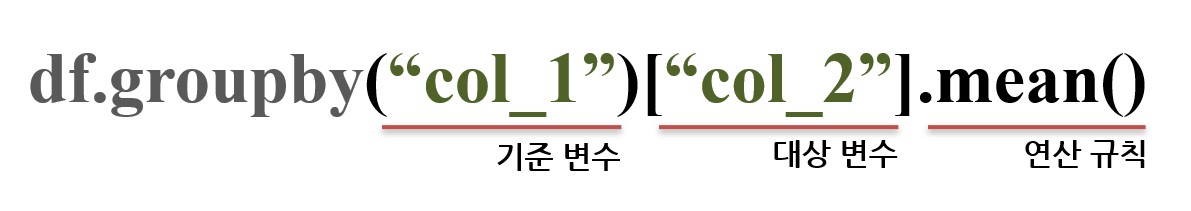

#### \[기출유형\] .agg() 와 딕셔너리를 활용하여 보다 간결하게 `.groupby()` 사용하기

In [137]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [140]:
df_g = df.groupby("holiday")[["temp", "atemp"]].agg({"temp": "mean",
                                                     "atemp": "max"}).reset_index()
df_g

,holiday,temp,atemp
0,0,20.230466,45.455
1,1,20.244244,42.425


In [141]:
df_g = df.groupby("holiday")[["temp", "atemp"]].agg({"temp": ["mean", "max"],
                                                     "atemp": "max"}).reset_index()
df_g

holiday       temp          atemp
                mean    max     max
0       0  20.230466  41.00  45.455
1       1  20.244244  37.72  42.425

#### 텍스트 처리
https://datadoctorblog.com/2023/04/20/Py-Basic-Pandas-String-Data/

In [142]:
df_t = pd.DataFrame(dict(v1 = [100, 200, 300],
                         t1 = ["aaa", "abc", "ccc"],
                         t2 = [123, "123-456", "010-1234-5678"]))
df_t

,v1,t1,t2
0,100,aaa,123
1,200,abc,123-456
2,300,ccc,010-1234-5678


In [144]:
df_t["t1"].replace("a", "😉")

0    aaa
1    abc
2    ccc
Name: t1, dtype: object

In [145]:
df_t["t1"].replace("aaa", "😉")

0      😉
1    abc
2    ccc
Name: t1, dtype: object

In [146]:
df_t["t1"].str.replace("a", "😉")

0    😉😉😉
1    😉bc
2    ccc
Name: t1, dtype: object

In [147]:
df_t["t1"].str.replace("aaa", "😉")

0      😉
1    abc
2    ccc
Name: t1, dtype: object

In [148]:
df_t["t1"].replace({"aaa": "😉",
                    "ccc": "😋"})

0      😉
1    abc
2      😋
Name: t1, dtype: object

In [150]:
df_t["t1"].str.contains("a")

0     True
1     True
2    False
Name: t1, dtype: bool

In [151]:
df_t.loc[df_t["t1"].str.contains("a"), ]

,v1,t1,t2
0,100,aaa,123
1,200,abc,123-456


In [154]:
df_t["t1"] + "zzzz"

0    aaazzzz
1    abczzzz
2    ccczzzz
Name: t1, dtype: object

In [157]:
df_t.loc[df_t["t1"].str.contains("^[^a]*?$"), ] # 처음부터 끝까지 a가 아닌 문자로 구성된 원소

,v1,t1,t2
2,300,ccc,010-1234-5678


In [158]:
df_t.loc[~df_t["t1"].str.contains("a"), ] # ~ 은 pandas에서 True/False 반전

,v1,t1,t2
2,300,ccc,010-1234-5678


In [163]:
df_t["t2"].str.split("-")

0                  NaN
1           [123, 456]
2    [010, 1234, 5678]
Name: t2, dtype: object

In [164]:
df_t["t2"].astype("str").str.split("-")

0                [123]
1           [123, 456]
2    [010, 1234, 5678]
Name: t2, dtype: object

In [ ]:
df_t["t2"].astype("str").str.split("-").explode() # 원소가 리스트인 경우 그 리스트 구조를 풀어버림

In [167]:
df_t_s = df_t["t2"].astype("str").str.split("-", expand = True)
df_t_s

,0,1,2
0,123,None,None
1,123,456,None
2,010,1234,5678


In [ ]:
df_t_s.fillna(-999)

In [169]:
df_t_s.columns = "t2_" + df_t_s.columns.astype("str")
df_t_s

,t2_0,t2_1,t2_2
0,123,None,None
1,123,456,None
2,010,1234,5678


In [171]:
df_t["t2"].str.len()

0     NaN
1     7.0
2    13.0
Name: t2, dtype: float64

In [173]:
df_t["t1"].str.replace("c", "") # c를 없애는 코드

0    aaa
1     ab
2       
Name: t1, dtype: object

In [174]:
pd.concat([df_t, df_t_s], axis = 1)

,v1,t1,t2,t2_0,t2_1,t2_2
0,100,aaa,123,123,None,None
1,200,abc,123-456,123,456,None
2,300,ccc,010-1234-5678,010,1234,5678


#### 시간 데이터 핸들링
https://datadoctorblog.com/2023/04/14/Py-Basic-Pandas-Time-Data/

In [175]:
ser_t1 = pd.Series(["2023-10-25", "2023-10-26", "2023-10-27"])
ser_t2 = pd.Series(["2023년 10월 25일", "2023년 10월 26일", "2023년 10월 27일"])
ser_t3 = pd.Series([123456, 234567, 345678])

In [180]:
pd.to_datetime(ser_t1)

0   2023-10-25
1   2023-10-26
2   2023-10-27
dtype: datetime64[ns]

In [181]:
pd.to_datetime(ser_t2) # Error!

C:\Users\Encaion\AppData\Local\Temp\ipykernel_24328\2392540413.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(ser_t2) # Error!


DateParseError: Unknown datetime string format, unable to parse: 2023년 10월 25일, at position 0

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [182]:
pd.to_datetime(ser_t2, format = "%Y년 %m월 %d일")

0   2023-10-25
1   2023-10-26
2   2023-10-27
dtype: datetime64[ns]

In [183]:
pd.to_datetime(ser_t3)

0   1970-01-01 00:00:00.000123456
1   1970-01-01 00:00:00.000234567
2   1970-01-01 00:00:00.000345678
dtype: datetime64[ns]

In [184]:
pd.to_datetime(ser_t3, origin = "2023-10-25")

0   2023-10-25 00:00:00.000123456
1   2023-10-25 00:00:00.000234567
2   2023-10-25 00:00:00.000345678
dtype: datetime64[ns]

In [185]:
pd.to_datetime(ser_t3, origin = "2023-10-25", unit = "s")

0   2023-10-26 10:17:36
1   2023-10-27 17:09:27
2   2023-10-29 00:01:18
dtype: datetime64[ns]

In [189]:
df = pd.read_csv("bike.csv")
df_t = df[["datetime"]].copy()
df_t.head(2)

,datetime
0,2011-01-01 00:00:00
1,2011-01-01 01:00:00


In [190]:
df_t["datetime"] = pd.to_datetime(df_t["datetime"])
df_t["year" ] = df_t["datetime"].dt.year
df_t["month"] = df_t["datetime"].dt.month
df_t["hour" ] = df_t["datetime"].dt.hour
df_t["date" ] = df_t["datetime"].dt.date
df_t["yyyymm"] = df_t["datetime"].dt.strftime("%Y%m")
df_t["mmdd"  ] = df_t["datetime"].dt.strftime("%m-%d")
df_t["wday"] = df_t["datetime"].dt.weekday
df_t["wend"] = np.where(df_t["wday"] >= 5, 1, 0) # 주말 1, 평일 0
df_t["wend"] = (df_t["wday"] >= 5) + 0

https://datadoctorblog.com/2023/04/12/Py-Basic-Pandas-New-Columns/

In [191]:
df_t.head(2)

,datetime,year,month,hour,date,yyyymm,mmdd,wday,wend
0,2011-01-01 00:00:00,2011,1,0,2011-01-01,201101,01-01,5,1
1,2011-01-01 01:00:00,2011,1,1,2011-01-01,201101,01-01,5,1


In [192]:
np.exp(1) # 로지스틱회귀 Odds Ratio(승산비)

2.718281828459045

In [193]:
np.where(np.array([1, 2, 3]) == 2, "a", "b")

array(['b', 'a', 'b'], dtype='<U1')

In [197]:
np.log(np.exp(1)) # np.log() 자연로그

1.0

In [200]:
np.log10(100)

2.0

In [201]:
np.r_[:4, 5, 7, 8:11]

array([ 0,  1,  2,  3,  5,  7,  8,  9, 10])

#### melt()
https://datadoctorblog.com/2023/05/07/Py-Basic-Pandas-Melt/

In [202]:
df_e = pd.read_csv("elec_load_2017_7d.csv")
df_e.head(2)

,YEAR,MONTH,DAY,X1HR,X2HR,X3HR,X4HR,X5HR,X6HR,X7HR,...,X15HR,X16HR,X17HR,X18HR,X19HR,X20HR,X21HR,X22HR,X23HR,X24HR
0,2017,1,1,60178,57862,56165,55135,54450,54401,54147,...,49213,49357,50362,53115,55205,55437,55348,55790,58195,59330
1,2017,1,2,57067,55148,53983,53571,54027,55388,57753,...,72228,71945,72641,73387,72294,69989,67893,66504,67435,69275


In [203]:
df_e_m = df_e.melt(id_vars = ["YEAR", "MONTH", "DAY"])
df_e_m.head(2)

,YEAR,MONTH,DAY,variable,value
0,2017,1,1,X1HR,60178
1,2017,1,2,X1HR,57067


In [204]:
df_e_m = df_e.melt(id_vars = ["YEAR", "MONTH", "DAY"],
                   var_name = "HOUR", value_name = "LOAD")
df_e_m.head(2)

,YEAR,MONTH,DAY,HOUR,LOAD
0,2017,1,1,X1HR,60178
1,2017,1,2,X1HR,57067


In [205]:
df_e_m = df_e.melt(id_vars = df_e.columns[:3],
                   var_name = "HOUR", value_name = "LOAD")
df_e_m.head(2)

,YEAR,MONTH,DAY,HOUR,LOAD
0,2017,1,1,X1HR,60178
1,2017,1,2,X1HR,57067


In [212]:
df_e_m["h1"] = df_e_m["HOUR"].str.replace("X", "")
df_e_m["h1"] = df_e_m["h1"  ].str.replace("HR", "")
df_e_m["h2"] = df_e_m["HOUR"].str.replace("X|HR", "", regex = True) # regex = True <-- 정규식 활성화
df_e_m["h3"] = df_e_m["HOUR"].str.replace("[A-Z]", "", regex = True) # 영문 대문자
df_e_m["h4"] = df_e_m["HOUR"].str.replace("[^0-9]", "", regex = True) # 숫자를 제외한 모든 문자

In [213]:
df_e_m.head(2)

,YEAR,MONTH,DAY,HOUR,LOAD,h1,h2,h3,h4
0,2017,1,1,X1HR,60178,1,1,1,1
1,2017,1,2,X1HR,57067,1,1,1,1


#### concat()
https://datadoctorblog.com/2023/05/22/Py-Basic-Pandas-Merge/#concat

In [214]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [217]:
df_a = df.iloc[:3, 5:8]
df_b = df.iloc[-3:, 5:8]

In [220]:
pd.concat([df_a, df_b])

,temp,atemp,humidity
0,9.84,14.395,81
1,9.02,13.635,80
2,9.02,13.635,80
10883,13.94,15.910,61
10884,13.94,17.425,61
10885,13.12,16.665,66


In [ ]:
pd.concat([df_a, df_b], axis = 1)

In [228]:
pd.concat([df_a, df_b.reset_index(drop = True)], axis = 1)

,temp,atemp,humidity,temp_b,atemp_b,humidity_b
0,9.84,14.395,81,13.94,15.910,61
1,9.02,13.635,80,13.94,17.425,61
2,9.02,13.635,80,13.12,16.665,66


In [224]:
df_b.columns = df_b.columns + "_b"
df_a.join(df_b.reset_index(), how = "inner")

,temp,atemp,humidity,index,temp_b,atemp_b,humidity_b
0,9.84,14.395,81,10883,13.94,15.910,61
1,9.02,13.635,80,10884,13.94,17.425,61
2,9.02,13.635,80,10885,13.12,16.665,66


#### lambda

In [229]:
df.groupby("season")["count"].mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

In [ ]:
df.groupby("season")["count"].agg("mean")

In [ ]:
df.groupby("season")["count"].agg(lambda x: x.mean())

In [ ]:
def ser_mean(x):
    return x.mean()

df.groupby("season")["count"].agg(ser_mean)

In [234]:
# df.groupby("season")["count"].agg(lambda x: x.mean())
x = df.loc[df["season"] == 1, "count"]
x.mean()

116.34326135517499